In [7]:
import os 
import requests 
import pandas as pd

In [ ]:
import pandas as pd

# Load the CSV
file_path = "social_spending_ssocx.csv"
df = pd.read_csv(file_path)

# Select and rename relevant columns
df_clean = df[["Reference area", "TIME_PERIOD", "OBS_VALUE"]].rename(
    columns={
        "Reference area": "Country",
        "TIME_PERIOD": "Year",
        "OBS_VALUE": "Public social spending (% of GDP)"
    }
)

# Convert year to integer
df_clean["Year"] = df_clean["Year"].astype(int)

# Convert spending to numeric
df_clean["Public social spending (% of GDP)"] = pd.to_numeric(df_clean["Public social spending (% of GDP)"], errors="coerce")

print(df_clean.head())

Saved dataset with 1838 rows to social_spending_owid.csv
Years covered: 1880 to 2022


In [ ]:
df_clean

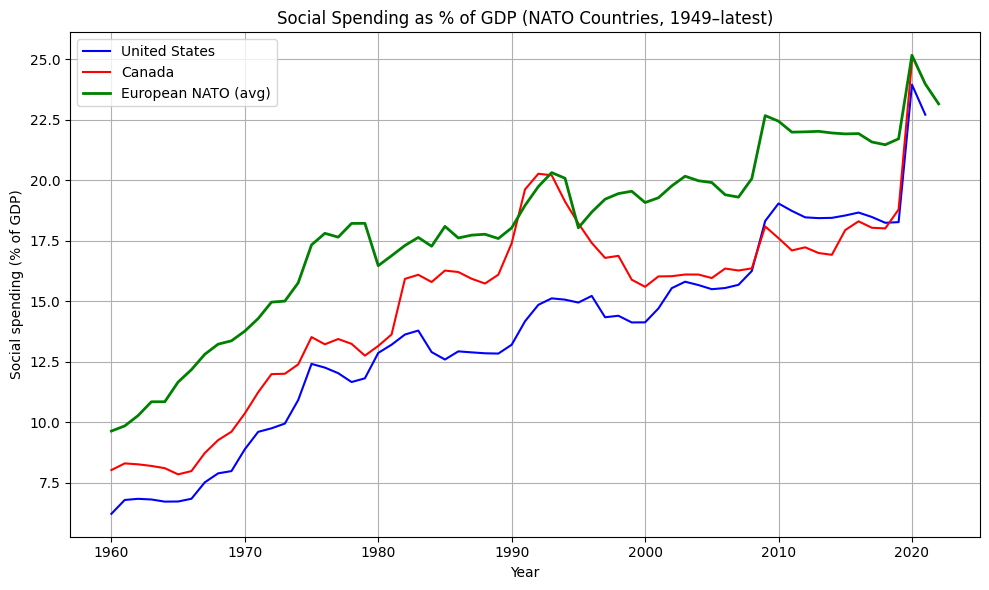

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Load OWID CSV (make sure you've downloaded & saved it)
df = pd.read_csv("social_spending_owid.csv")

# Rename value column for clarity
value_col = df.columns[-1]
df = df.rename(columns={value_col: "social_spending_gdp"})

# Full NATO list you gave
nato_countries = [
    "United States", "Canada", "United Kingdom", "France", "Germany",
    "Italy", "Spain", "Portugal", "Greece", "Turkey", "Belgium", "Netherlands",
    "Luxembourg", "Norway", "Denmark", "Iceland", "Poland", "Czech Republic",
    "Hungary", "Slovakia", "Slovenia", "Romania", "Bulgaria", "Estonia",
    "Latvia", "Lithuania", "Croatia", "Albania", "Montenegro", "North Macedonia"
]

# Filter only NATO countries present in dataset
df_nato = df[df["Entity"].isin(nato_countries)].copy()

# Filter for Year >= 1949
df_nato = df_nato[df_nato["Year"] >= 1949]

# Split categories
us = df_nato[df_nato["Entity"] == "United States"]
canada = df_nato[df_nato["Entity"] == "Canada"]

# European subset (exclude US and Canada)
europe = df_nato[~df_nato["Entity"].isin(["United States","Canada"])]

# Compute average across European NATO members by year
europe_avg = europe.groupby("Year")["social_spending_gdp"].mean().reset_index()

# Plot
plt.figure(figsize=(10,6))

plt.plot(us["Year"], us["social_spending_gdp"], label="United States", color="blue")
plt.plot(canada["Year"], canada["social_spending_gdp"], label="Canada", color="red")
plt.plot(europe_avg["Year"], europe_avg["social_spending_gdp"], label="European NATO (avg)", color="green", linewidth=2)

plt.title("Social Spending as % of GDP (NATO Countries, 1949–latest)")
plt.xlabel("Year")
plt.ylabel("Social spending (% of GDP)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
